In [2]:
#Install CLIP library
!pip install ../input/openaiclipweights/python-ftfy-master/python-ftfy-master
!pip install ../input/openaiclipweights/clip/CLIP
!cp ../input/openaiclipweights/CLIP-main/CLIP-main/clip/bpe_simple_vocab_16e6.txt /opt/conda/lib/python3.7/site-packages/clip/.
!gzip -k /opt/conda/lib/python3.7/site-packages/clip/bpe_simple_vocab_16e6.txt
!ls /opt/conda/lib/python3.7/site-packages/clip/.

Processing /kaggle/input/openaiclipweights/python-ftfy-master/python-ftfy-master
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for ftfy: filename=ftfy-6.0.2-py3-none-any.whl size=41932 sha256=31035353f079f75cc5133f5727bb478e87f371bd0001872ed02a1013adda665f
  Stored in directory: /root/.cache/pip/wheels/2e/98/80/ce5445e83c31c177bd363169ed65e9cb14156696de5721bd36
Successfully built ftfy
Processing /kaggle/input/openaiclipweights/clip/CLIP
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your

In [3]:
import os
import clip
import torch
#要指定all tensors to be on the same device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device = torch.device("cpu")
model, preprocess = clip.load('ViT-B/32', device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 125MiB/s]


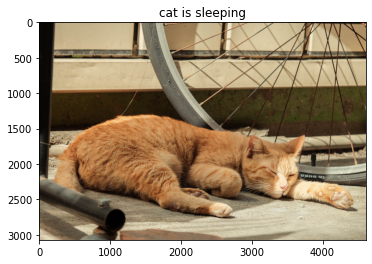

In [4]:
#開啟圖片
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("/kaggle/input/sleepingcat/-3.jpg")

plt.imshow(image) 
plt.title("cat is sleeping")
plt.show()
input_image = preprocess(image).unsqueeze(0).to(device)

In [6]:
#定義一些描述
descriptions = ["tail", "dog", "sleep", "cat", "bike", "cat is sleeping"]

# Clip: 這指的是你先前程式碼中已經載入的CLIP模型庫。文字與圖像。
# tokenize:這是CLIP函式庫提供的一個函數/方法。把這些組成部分編碼為唯一代表它們的數字。
#說明：這是包含您想要處理的文字的變數。
input_text = clip.tokenize(descriptions)

#每個描述的符合機率
with torch.no_grad():
    logits_of_image, logits_of_text = model(input_image, input_text)
    percent = logits_of_image.softmax(dim=-1).detach().cpu().numpy()[0]
    
for d, p in zip(descriptions, percent):
    print("{:>20s} = {:.2f}%".format(d, p * 100))

                tail = 0.80%
                 dog = 0.09%
               sleep = 5.87%
                 cat = 5.18%
                bike = 0.69%
     cat is sleeping = 87.37%
